In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

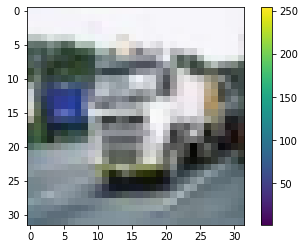

In [6]:
plt.figure()
plt.imshow(x_train[1000])
plt.colorbar()
plt.grid(False)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

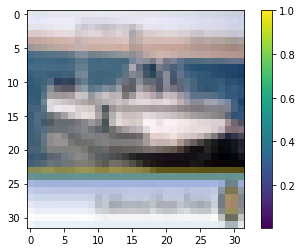

In [8]:
plt.figure()
plt.imshow(x_train[155])
plt.colorbar()
plt.grid(False)

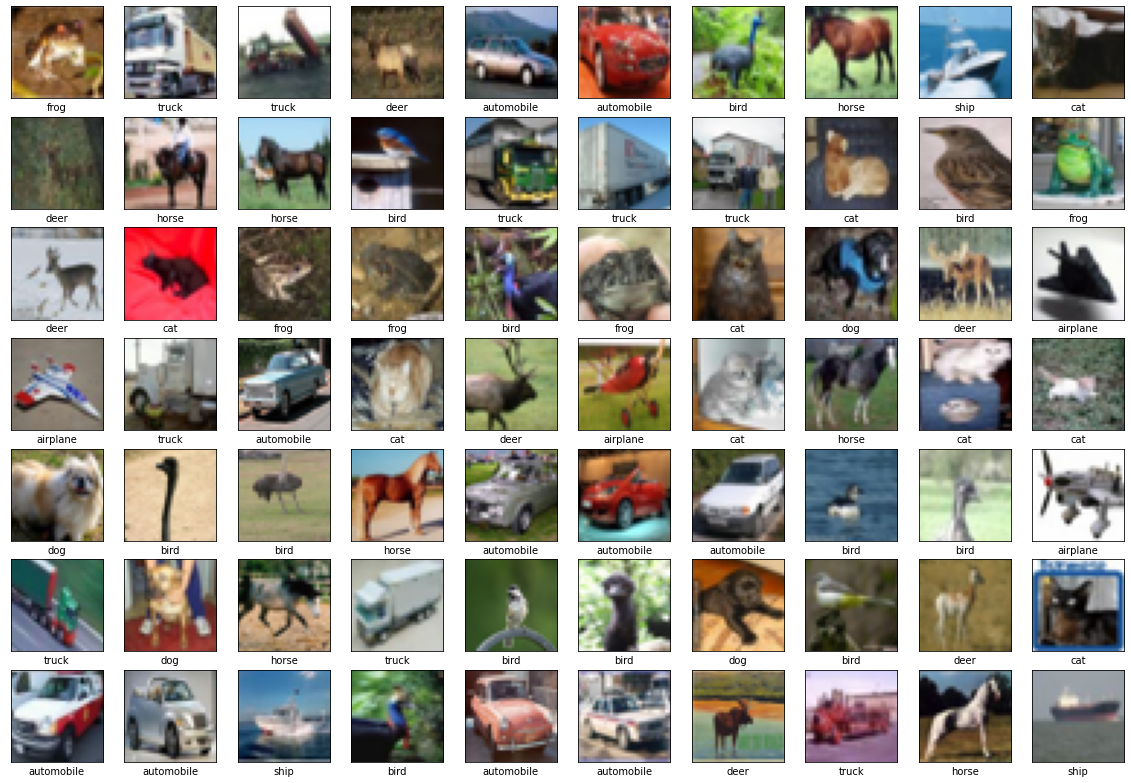

In [9]:
plt.figure(figsize = (20,20))
for i in range(70):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])

In [10]:
 model = keras.Sequential([
                      
                          keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(32, 32, 3)),
                          keras.layers.MaxPooling2D((2, 2)),
                          keras.layers.Conv2D(64,(3,3),activation='relu'),
                          keras.layers.MaxPooling2D((2, 2)),
                          keras.layers.Conv2D(128,(3,3),activation='relu'),
                          keras.layers.Flatten(input_shape=(32,32,3)),
                          keras.layers.Dense(256, activation="relu"),
                          keras.layers.Dense(10,activation="softmax")
    
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               5

In [11]:
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 40s 25ms/step - loss: 1.3983 - accuracy: 0.4966
Epoch 2/15
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9857 - accuracy: 0.6543
Epoch 3/15
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8024 - accuracy: 0.7182
Epoch 4/15
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6776 - accuracy: 0.7628
Epoch 5/15
1563/1563 [==============================] - 36s 23ms/step - loss: 0.5658 - accuracy: 0.8008
Epoch 6/15
1563/1563 [==============================] - 37s 24ms/step - loss: 0.4647 - accuracy: 0.8364
Epoch 7/15
1563/1563 [==============================] - 36s 23ms/step - loss: 0.3714 - accuracy: 0.8677
Epoch 8/15
1563/1563 [==============================] - 36s 23ms/step - loss: 0.2850 - accuracy: 0.8994
Epoch 9/15
1563/1563 [==============================] - 36s 23ms/step - loss: 0.2287 - accuracy: 0.9187
Epoch 10/15
1563/1563 [==============================] - 36s 23m

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 1.6893 - accuracy: 0.7077
Test loss: 1.6892591714859009
Test accuracy: 0.7077000141143799


In [14]:
predictions = model.predict(x_train)

In [23]:
n=27541
predictions[n]

array([3.2564383e-08, 3.2708627e-11, 4.7458681e-08, 3.0826501e-09,
       5.0435920e-16, 4.1296834e-04, 9.2695001e-07, 6.5908605e-11,
       9.9958128e-01, 4.7748922e-06], dtype=float32)

In [24]:
np.argmax(predictions[n])

8

In [25]:
y_train[n]

8

Text(0.5, 0, 'ship')

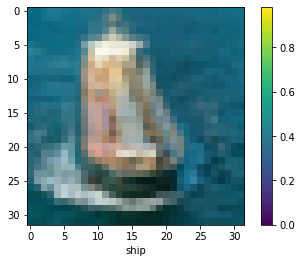

In [26]:
plt.figure()
plt.imshow(x_train[n])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[y_train[n]])